# N-Armed Bandit Problem

## ϵ (epsilon)-greedy algorithm
"One very famous approach to solving reinforcement learning problems is the ϵ (epsilon)-greedy algorithm, such that, with a probability ϵ, you will choose an action a at random (exploration), and the rest of the time (probability 1−ϵ) you will select the best lever based on what you currently know from past plays (exploitation). So most of the time you play greedy, but sometimes you take some risks and choose a random lever and see what happens."

Experiment inspired by https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning#implementation

In [9]:
#import necessary packages
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(5)

In [19]:
#calculate the reward from the choice, mean and variance in the Q_values table
def Reward(choice, buttons_mean, buttons_variance):
    current_reward = np.random.normal(buttons_mean[choice],buttons_variance[choice])
    return current_reward

#Trial creates a new Q table to enact the Policy over "it" number of iterations
def Trial(eps,num_buttons,buttons_mean,buttons_variance,it=1000):
    Q_values = np.zeros(num_buttons) #initialize Q_values table
    Q_tracker = np.zeros(num_buttons) #initialze tracking table
    all_rewards = []
    for i in range(it):
        choice = Policy(eps,num_buttons,Q_values) #make choice
        current_reward = Reward(choice,buttons_mean,buttons_variance) #get reward
        all_rewards.append(current_reward) #store reward
        Q_values,Q_tracker = UpdateQTable(choice,current_reward,Q_values,Q_tracker) #calculate new mean in Q_values table
    return all_rewards #return rewards from the trials

#Experiment now takes a list of epsilons to determine how different choices of greedy epsilons affect convergence of the Policy
def Experiment(eps_list,num_buttons):
    eps_rewards = []
    for eps in eps_list: #iterate over different values of epsilon and run a trial for each
        eps_rewards.append(Trial(eps,num_buttons,buttons_mean,buttons_variance))        
    return eps_rewards #return all rewards for each epsilon value and trial
    

'''TO DO SECTION'''
    
#create an epsilon-greedy policy function that will allow our n-armed bandit to choose which button to press
def Policy(eps,num_buttons,Q_values):
    #initialize a random greedy probability
    greedy_prob =  ###TO DO###
   
    #make a random choice if the greedy_prob is less than eps otherwise take the best choice
    ###TO DO ###
    
    return choice    

#write a function to figure out how to update the Q_values table
#UpdateQTable updates both Q_values with a new current mean and also updates Q_tracker, tracking the number of times
#Q_tracker[choice] has been chosen
#return Q_value, Q_tracker as a tuple
def UpdateQTable(choice,current_reward,Q_values,Q_tracker):
    ###TO DO###
    return Q_values, Q_tracker   

SyntaxError: invalid syntax (<ipython-input-19-2fdbe0d105f4>, line 36)

In [15]:
eps_list = [] ###TO DO### choose 3 values of epsilon

num_buttons = 10 #number of buttons or arms our machine has

buttons_mean = [np.random.normal(100,10) for x in range(num_buttons)] #initialize mean of each button
buttons_variance = [np.random.normal(5,2) for x in range(num_buttons)] #initialize variance of each button

# run the experiment
final_exp = ###TO DO###

#compute running average of reward
for i in range(len(final_exp)):
    for j in range(len(final_exp[0])):
        final_exp[i][j] = np.mean(final_exp[i][:j+1])
        


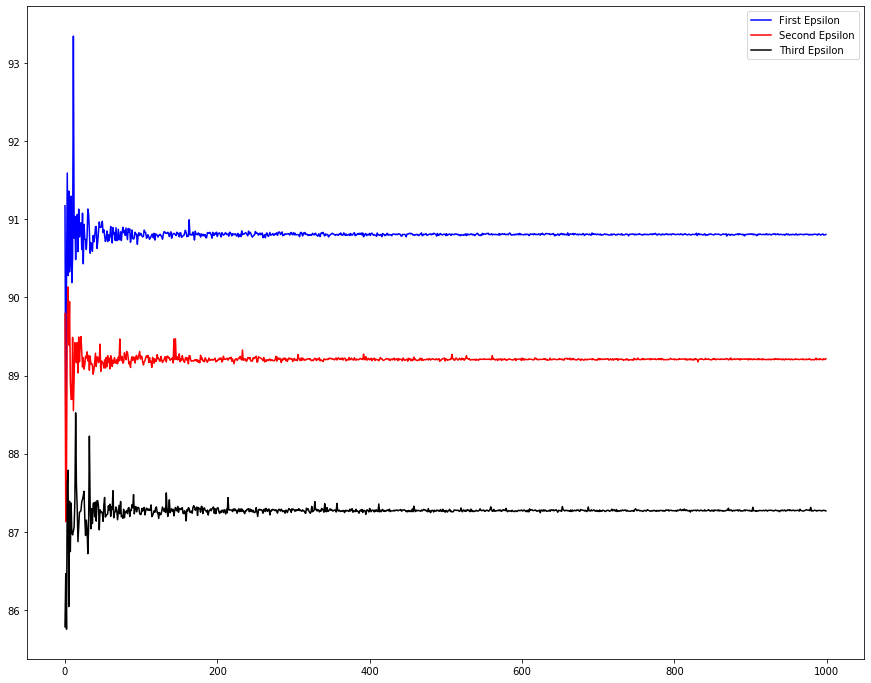

In [18]:
#plot the convergence of the reward's running average for various epsilon values
#if you use more or less than 3 epsilons you will need to change the code below
plt.figure(figsize=(15,12))
plt.plot(final_exp[0],'b',label = 'First Epsilon')#blue
plt.plot(final_exp[1],'r',label = 'Second Epsilon')#red
plt.plot(final_exp[2],'k',label = 'Third Epsilon')#black
plt.legend()
plt.show()